## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')

## Import Datasets

In [2]:
df_2004 = pd.read_csv('LokSabha2004.csv')
df_2009 = pd.read_csv('LokSabha2009.csv')
df_2014 = pd.read_csv('LokSabha2014.csv')
df_2019 = pd.read_csv('LokSabha2019.csv')

df_2004['Year'] = 2004
df_2009['Year'] = 2009
df_2014['Year'] = 2014
df_2019['Year'] = 2019

df = pd.concat([df_2004, df_2009, df_2014, df_2019])
df = df.drop(columns=['Candidate'], axis = 1)
df.head()

,Party,Criminal Cases,Education,Age,Total Assets,Constituency,Liabilities,Winner,Gender,Year
0,INC,0,Post Graduate,65,5926740.0,Andaman & Nicobar Islands,272061,1.0,M,2004
1,BSP,0,Graduate,61,7876500.0,Andaman & Nicobar Islands,65000,0.0,M,2004
2,IND,0,Graduate,50,3070000.0,Andaman & Nicobar Islands,0,0.0,M,2004
3,BJP,0,Graduate,54,1250619.0,Andaman & Nicobar Islands,128710,0.0,M,2004
4,IND,0,Not Given,28,3000.0,Andaman & Nicobar Islands,0,0.0,M,2004


In [3]:
parties = df['Party'].unique()
qualifications = df['Education'].unique()
constituencies = df['Constituency'].unique()

In [8]:
def analysis(constituency):
    global df
    df = df[df['Constituency'] == constituency]
    print(f"Analysis of '{constituency}' Constituency")
    
    # Winning Parties
    winner = df[df['Winner'] == 1.0]
    plt.figure(figsize = (10, 8))
    sns.countplot(x = 'Party', data = winner)
    plt.title('Parties Won')
    plt.xlabel('Party', fontsize = 15)
    plt.ylabel('Count', fontsize = 15)
    plt.xticks(fontsize = 12, rotation = 90)
    plt.yticks(fontsize = 12)
    plt.show()

    # Educational Qualification 
    plt.figure(figsize = (10, 8))
    sns.countplot(x = 'Education', hue = 'Winner', data = df)
    plt.title('Educational Qualification of the Candidates')
    plt.xlabel('Qualifications', fontsize = 15)
    plt.ylabel('Count', fontsize = 15)
    plt.xticks(fontsize = 12, rotation = 90)
    plt.yticks(fontsize = 12)
    plt.show()

    # Criminal Cases
    df_crime = df.groupby('Party').agg({'Criminal Cases':'sum'}).reset_index()
    plt.figure(figsize = (10, 8))
    sns.barplot(x = 'Party', y = 'Criminal Cases', data = df_crime)
    plt.title('Number of Criminal Cases of the Candidates')
    plt.xlabel('Parties', fontsize = 15)
    plt.ylabel('Count', fontsize = 15)
    plt.xticks(fontsize = 12, rotation = 90)
    plt.yticks(fontsize = 12)
    plt.show()

    # Age
    plt.figure(figsize = (10, 8))
    sns.countplot(x = 'Age', hue = 'Winner', palette = 'muted', data = df)
    plt.xlabel('Age', fontsize = 15)
    plt.ylabel('Count', fontsize = 15)
    plt.xticks(fontsize = 12, rotation = 90)
    plt.yticks(fontsize = 12)
    plt.show()
    
#     # Assets
#     plt.figure(figsize = (10, 8))
#     sns.histplot(x = 'Party',y = 'Total Assets', data = df, hue = 'Winner')
#     plt.title('Total Assets of the candidates')
#     plt.xlabel('Parties', fontsize = 15)
#     plt.ylabel('Assets', fontsize = 15)
#     plt.xticks(fontsize = 12, rotation = 90)
#     plt.yticks(fontsize = 12)
#     plt.show()
        
        
#         # Party Participation
#         sns.countplot(x = 'Party', hue = 'Winner', data = df, ax = axes[1, 1])
#         axes[1, 1].set_title('Party Pariticipations')

Analysis of 'Chandigarh' Constituency


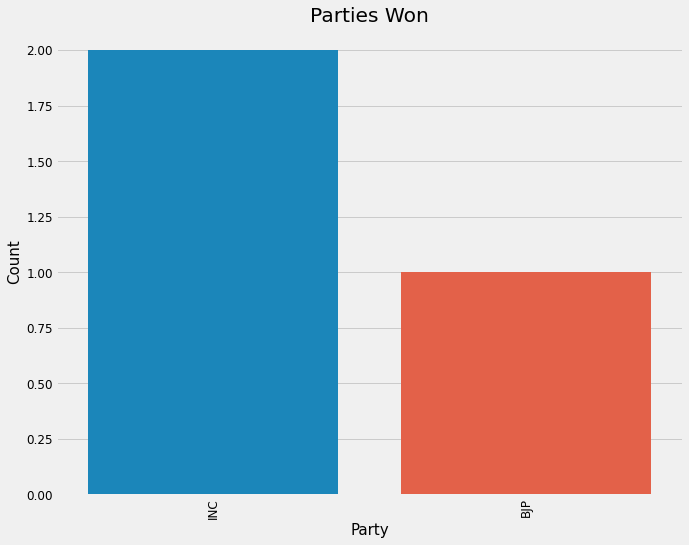

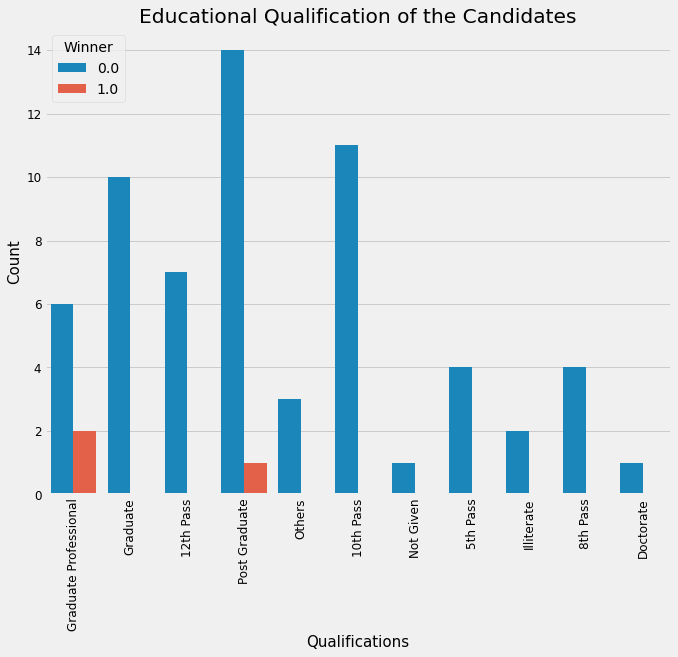

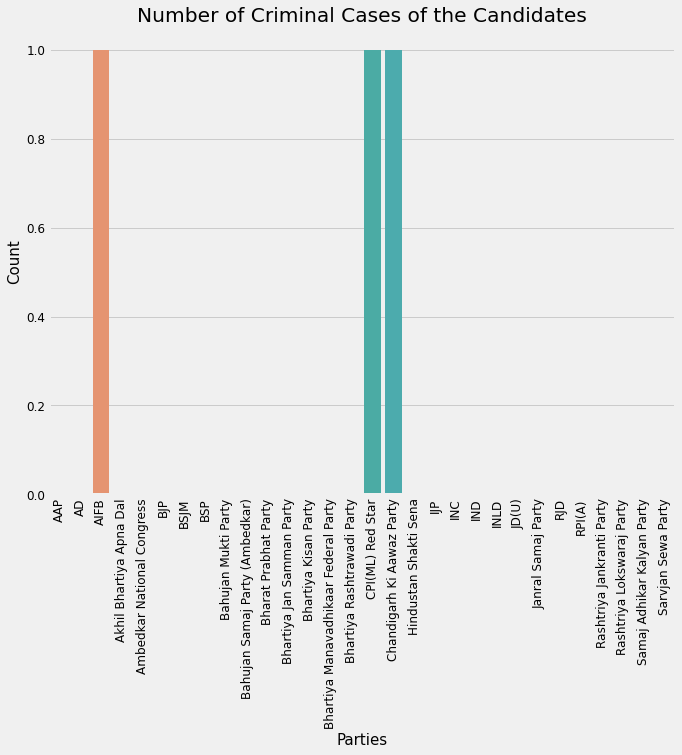

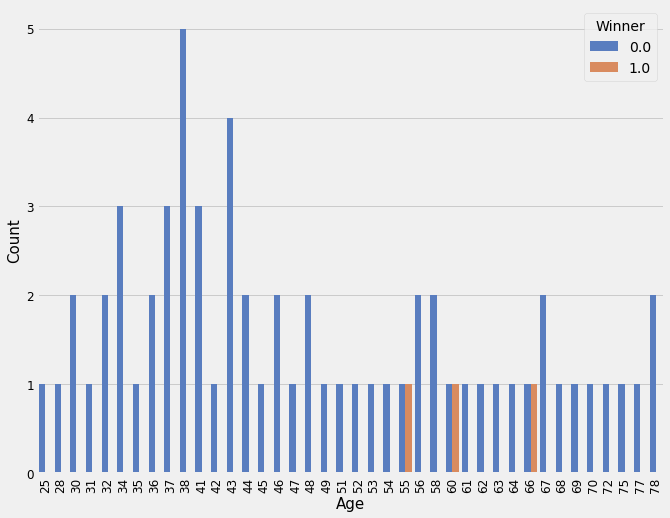

In [9]:
analysis('Chandigarh')